# Text Analysis: Twitter data - Sentiment Analysis

## Samuel Geevarughese 

Get all libraries

In [1]:
import numpy as np
import pandas as pd
import string
import nltk
import re
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/samuelgeevarughese/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samuelgeevarughese/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samuelgeevarughese/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Read in the file into a list of dictionaries

In [4]:
#cwctweets looks like a json file, but is not
#read it in and use eval to convert each line to a dictionary
#then append it to a list

In [5]:
listOfD = []
with open("cwctweets.txt") as f:
    for line in f:
        d = eval(line)
        listOfD.append(d)

Check the length of the List and Dictionaries

In [6]:
#there should be ten dictionaries in the list

In [7]:
print("The length of the list of dictionaries: ",len(listOfD))
print("The length of a dictionary within the list is", len(listOfD[1]))

The length of the list of dictionaries:  10
The length of a dictionary within the list is 2


Get statuses into a list

In [8]:
#Get all 'statuses' using key 'statuses'

In [9]:
statuses = []
for index in range(0, len(listOfD)):
    statuses.append(listOfD[index]['statuses'])

Check it's length

In [10]:
len(statuses)

10

In [11]:
statuses = [item for sublist in statuses for item in sublist]

Get the tweets

In [12]:
#use each status to get text - text is a key

In [13]:
text = []
for i in statuses:
    text.append(i["text"])

In [14]:
#display all the tweets

In [15]:
text

['RT @Finolexwater: Contest coming up on Sunday! #WorldCup #CWC15 #IndvsSA @Contestoday',
 'Consummate performance from @BLACKCAPS today, especially McCullum and @TimSouthee_NZ keep it rolling lads! #CWC15 #NZvsENG #Contenders',
 'RT @Lays_India: Want to go to #cwc15 final?Just Download the latest Twitter app: https://t.co/7fl7L4qZ2u &amp; Stay tuned! http://t.co/3fMYWQGN…',
 'RT @cricinfo_record: ODI record on Saturday:\nPakistan: won 60, lost 71, tied 1.\nWest Indies: won 79, lost 57, tied 2.\n#PAKvWI: WI won 15, P…',
 "RT @SkySportsNewsHQ: This is England's World Cup record against major test playing nations since 1996. #SSNHQ #CWC15 http://t.co/HojubGoEae",
 'RT @ibnlive: #CWC15: Dhawan (54*) turning the heat on Pakistan. Kohli 5 away from fifty. India 116/1 in 22 overs. LIVE http://t.co/4sh96k5B…',
 "AUSTRALIA vs WEST INDIES at BRISBAN.\n\nAll australian's fans pray for team.\n\n#CWC15\n#BESTLUCKAUS",
 '@SuperSportTV if he aint embarrassed,n its a problem. That was embarrassing  #

Check it's length

In [16]:
#Check the length of d

In [17]:
print("Length of the Tweet List is ", len(text))

Length of the Tweet List is  235


Display the first tweet and check it's length

In [18]:
#Display the first element of d - check its length as well

In [19]:
print("The first tweet is: ", text[0])
print("The length of the first tweet is ", len(text[0]))

The first tweet is:  RT @Finolexwater: Contest coming up on Sunday! #WorldCup #CWC15 #IndvsSA @Contestoday
The length of the first tweet is  85


Get the users and locations of the users

In [20]:
#get the locations from where the tweets were sent, if available

In [21]:
loc = []
name = []
for i in range(0, len(statuses)):
    loc.append(statuses[i]["user"]["location"])
    name.append(statuses[i]["user"]["name"])

In [22]:
loc #some of them might be empty

['',
 'Brisbane',
 'Delhi',
 '',
 'manchester',
 'Rajkot',
 '',
 'Trippoli',
 'East London',
 'walsall .uk',
 "INDIA 'BANGALORE'",
 'Bangalore, India',
 'Tanuku',
 'Mangalore, India',
 '',
 '',
 '',
 '',
 '',
 'Gosport',
 'Sri Lanka',
 'Port Elizabeth • South Africa ',
 '',
 'Pune',
 'Karachi',
 'Pakistan',
 'Panaji, Goa',
 'From Mumbai, India.',
 'Abu Dhabi',
 'Kandy, Sri Lanka',
 'Surat, Gujarat,India',
 '',
 'PESHAWAR',
 'Coimbatore,India',
 '',
 '',
 'Pakistan',
 '',
 '',
 '',
 'Pakistan',
 'Trippoli',
 '',
 '',
 '',
 'WORLD PEACE CENTRE',
 '@PawanKalyan Devote ekAdaa..!!',
 '',
 'India',
 'India (bhoapl)',
 'Birmingham , UK',
 'India',
 'Bahawalnagar, Pakistan',
 'MediaCityUK, Salford',
 'South Africa',
 'Karachi   PAKISTAN',
 '',
 'India',
 '',
 '',
 '',
 'Leicestershire UK',
 'Lahore, Pakistan',
 '',
 '',
 'Islamabad, Pakistan',
 'Pakistan',
 'Pakistan',
 '',
 'Longford, Ireland',
 '',
 'India',
 '',
 'Guwahati,India',
 'Lahore',
 '',
 '',
 '',
 'Washington DC',
 'Guwahati,India

Get the popular hashtags

In [23]:
#Find the top 5 hashtags used in the tweets - hint look at 'entities'
#under each status; then look at 'hashtags' under 'entities'

In [24]:
entities = []
for index in range(0, len(statuses)):
    entities.append(statuses[index]['entities']["hashtags"])

In [25]:
entitiesList = [item for sublist in entities for item in sublist]

In [26]:
hashtags = []
for h in range(0, len(entitiesList)):
    d = entitiesList[h]["text"]
    hashtags.append(d)
hashtags_final = map(lambda x:x.lower(),hashtags)

In [27]:
top_hashtags = []

In [28]:
from collections import Counter
words_to_count = (word for word in hashtags_final if word[:1])
c = Counter(words_to_count)
top_hashtags.append(c.most_common(5))

In [29]:
hashtagsDF = pd.DataFrame.from_records([{k: v for v, k in row} for row in top_hashtags])

In [30]:
hashtagsDF = hashtagsDF.rename(index={0: 'Frequent Words'})

The 5 most popular hashtags with their frequency

In [31]:
hashtagsDF

,7,12,13,44,239
Frequent Words,ssnhq,indvssa,pakvwi,nzveng,cwc15


Clean the tweets

In [32]:
def strip_hashtag_links(text):
    hashlink_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    hlinks  = re.findall(hashlink_regex, text)
    for hlink in hlinks:
        text = text.replace(hlink[0], ', ')    
    return text

In [33]:
def strip_all_entities(text):
    prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in prefixes:
                words.append(word)
    return ' '.join(words)

In [34]:
text_s1 = []
for tweet in text:
    text_s1.append(strip_all_entities(strip_hashtag_links(tweet)))

In [35]:
text_s1

['RT Contest coming up on Sunday',
 'Consummate performance from today especially McCullum and NZ keep it rolling lads',
 'RT India Want to go to final Just Download the latest Twitter app amp Stay tuned …',
 'RT record ODI record on Saturday Pakistan won 60 lost 71 tied 1 West Indies won 79 lost 57 tied 2 WI won 15 P…',
 'RT This is England s World Cup record against major test playing nations since 1996',
 'RT Dhawan 54 turning the heat on Pakistan Kohli 5 away from fifty India 116 1 in 22 overs LIVE …',
 'AUSTRALIA vs WEST INDIES at BRISBAN All australian s fans pray for team',
 'if he aint embarrassed n its a problem That was embarrassing',
 'RT The most destructive innings at WATCH Brendon McCullum smash a 50 off just 18 balls …',
 'Looks like we ll be doing an all nighter tonight 10pm UK time',
 'RT “@googleindia is still going strong ”',
 'RT India Want to go to final Just Download the latest Twitter app amp Stay tuned …',
 'RT Here are some of the key stats as New Zealand thras

In [36]:
text_s2 = []
rt = re.compile('(\s*)RT(\s*)')
for tweet in text_s1: 
    text_s2.append(rt.sub('', tweet))

In [37]:
text_s2

['Contest coming up on Sunday',
 'Consummate performance from today especially McCullum and NZ keep it rolling lads',
 'India Want to go to final Just Download the latest Twitter app amp Stay tuned …',
 'record ODI record on Saturday Pakistan won 60 lost 71 tied 1 West Indies won 79 lost 57 tied 2 WI won 15 P…',
 'This is England s World Cup record against major test playing nations since 1996',
 'Dhawan 54 turning the heat on Pakistan Kohli 5 away from fifty India 116 1 in 22 overs LIVE …',
 'AUSTRALIA vs WEST INDIES at BRISBAN All australian s fans pray for team',
 'if he aint embarrassed n its a problem That was embarrassing',
 'The most destructive innings at WATCH Brendon McCullum smash a 50 off just 18 balls …',
 'Looks like we ll be doing an all nighter tonight 10pm UK time',
 '“@googleindia is still going strong ”',
 'India Want to go to final Just Download the latest Twitter app amp Stay tuned …',
 'Here are some of the key stats as New Zealand thrashed England earlier today',

In [38]:
text_s3 = []

In [39]:
def clean_text(tweet):
    return " ".join(re.sub("(@[A-Za-z]+)|([^A-Za-z \t])", " ", tweet).split())

In [40]:
text_s3 = []
for line in text_s2:
    text_s3.append(clean_text(line.lower()))

In [41]:
text_s3

['contest coming up on sunday',
 'consummate performance from today especially mccullum and nz keep it rolling lads',
 'india want to go to final just download the latest twitter app amp stay tuned',
 'record odi record on saturday pakistan won lost tied west indies won lost tied wi won p',
 'this is england s world cup record against major test playing nations since',
 'dhawan turning the heat on pakistan kohli away from fifty india in overs live',
 'australia vs west indies at brisban all australian s fans pray for team',
 'if he aint embarrassed n its a problem that was embarrassing',
 'the most destructive innings at watch brendon mccullum smash a off just balls',
 'looks like we ll be doing an all nighter tonight pm uk time',
 'is still going strong',
 'india want to go to final just download the latest twitter app amp stay tuned',
 'here are some of the key stats as new zealand thrashed england earlier today',
 'of course it s all about one good win and our boys will be back and 

Remove stopwords

In [42]:
text_s4 = []
stopwords = nltk.corpus.stopwords.words("english")
for tweet in text_s3:
    tweet_word = tweet.split()
    tweet_word = [w for w in tweet_word if w not in stopwords]
    text_s4.append(tweet_word)
text_s5 = []
for item in text_s4:
    text_s5.append(" ".join(item))

In [43]:
text_s5

['contest coming sunday',
 'consummate performance today especially mccullum nz keep rolling lads',
 'india want go final download latest twitter app amp stay tuned',
 'record odi record saturday pakistan lost tied west indies lost tied wi p',
 'england world cup record major test playing nations since',
 'dhawan turning heat pakistan kohli away fifty india overs live',
 'australia vs west indies brisban australian fans pray team',
 'aint embarrassed n problem embarrassing',
 'destructive innings watch brendon mccullum smash balls',
 'looks like nighter tonight pm uk time',
 'still going strong',
 'india want go final download latest twitter app amp stay tuned',
 'key stats new zealand thrashed england earlier today',
 'course one good win boys back roaring keep calm support sl',
 'world cup head head records total matches pakistan west indies nr tie',
 'world cup beige brigade outsmart footsore barmy army com',
 'record england odi record th february v nz v zim nz tied v nz v nz',
 'l

In [44]:
tweetList = pd.DataFrame(np.column_stack([text, text_s5]), 
                               columns=['Original', 'Cleaned without Stopwords'])

In [45]:
tweetList.head()

,Original,Cleaned without Stopwords
0,RT @Finolexwater: Contest coming up on Sunday!...,contest coming sunday
1,"Consummate performance from @BLACKCAPS today, ...",consummate performance today especially mccull...
2,RT @Lays_India: Want to go to #cwc15 final?Jus...,india want go final download latest twitter ap...
3,RT @cricinfo_record: ODI record on Saturday:\n...,record odi record saturday pakistan lost tied ...
4,RT @SkySportsNewsHQ: This is England's World C...,england world cup record major test playing na...


Lemmatization

In [46]:
lemmatized = [[wordnet_lemmatizer.lemmatize(word) for word in nltk.word_tokenize(s)] for s in text_s5]
text_s6 = []
for item in lemmatized:
    text_s6.append(" ".join(item))

In [47]:
text_s6

['contest coming sunday',
 'consummate performance today especially mccullum nz keep rolling lad',
 'india want go final download latest twitter app amp stay tuned',
 'record odi record saturday pakistan lost tied west indie lost tied wi p',
 'england world cup record major test playing nation since',
 'dhawan turning heat pakistan kohli away fifty india over live',
 'australia v west indie brisban australian fan pray team',
 'aint embarrassed n problem embarrassing',
 'destructive inning watch brendon mccullum smash ball',
 'look like nighter tonight pm uk time',
 'still going strong',
 'india want go final download latest twitter app amp stay tuned',
 'key stats new zealand thrashed england earlier today',
 'course one good win boy back roaring keep calm support sl',
 'world cup head head record total match pakistan west indie nr tie',
 'world cup beige brigade outsmart footsore barmy army com',
 'record england odi record th february v nz v zim nz tied v nz v nz',
 'lovely see allan

Frequency Plot of the top 25 words

In [48]:
#Create a frequency plot of the top 25 words#hint: use nltk.FreqDist

In [49]:
words = []
for sent in text_s6:
    word = nltk.word_tokenize(sent)
    words.append(word)

In [50]:
pop_words = [item for sublist in words for item in sublist]

In [51]:
freq = nltk.FreqDist(pop_words)

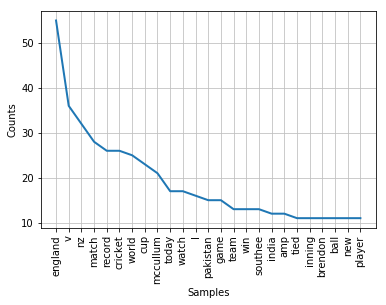

In [52]:
freq.plot(25)

Adding Lemmatized tweets to a dataframe

In [53]:
tweetList["Lemmatized"] = text_s6

In [54]:
tweetList.head()

,Original,Cleaned without Stopwords,Lemmatized
0,RT @Finolexwater: Contest coming up on Sunday!...,contest coming sunday,contest coming sunday
1,"Consummate performance from @BLACKCAPS today, ...",consummate performance today especially mccull...,consummate performance today especially mccull...
2,RT @Lays_India: Want to go to #cwc15 final?Jus...,india want go final download latest twitter ap...,india want go final download latest twitter ap...
3,RT @cricinfo_record: ODI record on Saturday:\n...,record odi record saturday pakistan lost tied ...,record odi record saturday pakistan lost tied ...
4,RT @SkySportsNewsHQ: This is England's World C...,england world cup record major test playing na...,england world cup record major test playing na...


Sentiment Analysis

In [55]:
def sentiment_analysis(tweet):
    t = TextBlob(tweet)
    return t.sentiment

In [56]:
tweetList['Sentiment'] = tweetList.apply(lambda row: sentiment_analysis(row['Lemmatized']), axis=1)

In [57]:
tweetList.head(10)

,Original,Cleaned without Stopwords,Lemmatized,Sentiment
0,RT @Finolexwater: Contest coming up on Sunday!...,contest coming sunday,contest coming sunday,"(0.0, 0.0)"
1,"Consummate performance from @BLACKCAPS today, ...",consummate performance today especially mccull...,consummate performance today especially mccull...,"(0.475, 1.0)"
2,RT @Lays_India: Want to go to #cwc15 final?Jus...,india want go final download latest twitter ap...,india want go final download latest twitter ap...,"(0.25, 0.95)"
3,RT @cricinfo_record: ODI record on Saturday:\n...,record odi record saturday pakistan lost tied ...,record odi record saturday pakistan lost tied ...,"(0.0, 0.0)"
4,RT @SkySportsNewsHQ: This is England's World C...,england world cup record major test playing na...,england world cup record major test playing na...,"(0.0625, 0.5)"
5,RT @ibnlive: #CWC15: Dhawan (54*) turning the ...,dhawan turning heat pakistan kohli away fifty ...,dhawan turning heat pakistan kohli away fifty ...,"(0.13636363636363635, 0.5)"
6,AUSTRALIA vs WEST INDIES at BRISBAN.\n\nAll au...,australia vs west indies brisban australian fa...,australia v west indie brisban australian fan ...,"(0.0, 0.0)"
7,"@SuperSportTV if he aint embarrassed,n its a p...",aint embarrassed n problem embarrassing,aint embarrassed n problem embarrassing,"(0.0, 0.0)"
8,RT @ICC: The most destructive innings at #cwc1...,destructive innings watch brendon mccullum sma...,destructive inning watch brendon mccullum smas...,"(-0.6, 0.6)"
9,Looks like we'll be doing an all nighter tonig...,looks like nighter tonight pm uk time,look like nighter tonight pm uk time,"(0.0, 0.0)"


In [58]:
len(tweetList)

235

Adding Users and Locations to the final dataframe

In [59]:
tweetList["User"] = name
tweetList["Location"] = loc

In [60]:
tweetList.head()

,Original,Cleaned without Stopwords,Lemmatized,Sentiment,User,Location
0,RT @Finolexwater: Contest coming up on Sunday!...,contest coming sunday,contest coming sunday,"(0.0, 0.0)",Chetan Chaurasiya,
1,"Consummate performance from @BLACKCAPS today, ...",consummate performance today especially mccull...,consummate performance today especially mccull...,"(0.475, 1.0)",Simmo and Leroy,Brisbane
2,RT @Lays_India: Want to go to #cwc15 final?Jus...,india want go final download latest twitter ap...,india want go final download latest twitter ap...,"(0.25, 0.95)",aditi,Delhi
3,RT @cricinfo_record: ODI record on Saturday:\n...,record odi record saturday pakistan lost tied ...,record odi record saturday pakistan lost tied ...,"(0.0, 0.0)",Syed Azam Bukhari,
4,RT @SkySportsNewsHQ: This is England's World C...,england world cup record major test playing na...,england world cup record major test playing na...,"(0.0625, 0.5)",Ed Hooley,manchester


In [61]:
#Display the total sentiment score for each tweet
#output should be in the following format:
#Tweet#  User   Country   Sentiment Score

In [62]:
finalTweetList = tweetList[["Original", "Lemmatized", "User", "Location", "Sentiment"]]

In [63]:
finalTweetList.head()

,Original,Lemmatized,User,Location,Sentiment
0,RT @Finolexwater: Contest coming up on Sunday!...,contest coming sunday,Chetan Chaurasiya,,"(0.0, 0.0)"
1,"Consummate performance from @BLACKCAPS today, ...",consummate performance today especially mccull...,Simmo and Leroy,Brisbane,"(0.475, 1.0)"
2,RT @Lays_India: Want to go to #cwc15 final?Jus...,india want go final download latest twitter ap...,aditi,Delhi,"(0.25, 0.95)"
3,RT @cricinfo_record: ODI record on Saturday:\n...,record odi record saturday pakistan lost tied ...,Syed Azam Bukhari,,"(0.0, 0.0)"
4,RT @SkySportsNewsHQ: This is England's World C...,england world cup record major test playing na...,Ed Hooley,manchester,"(0.0625, 0.5)"
